In [1]:
import sys
sys.path.insert(1, '/home/afkirby/Analysis')

In [2]:
%matplotlib inline

In [3]:
from read_penguin import *
import matplotlib.pyplot as plt
import numpy as np
from Transform import *
import multiprocessing as mp
from mass_flux_2D import *
from Flow import *
import Geometry as geo
from Search import *

In [4]:
#Loading Data
xres3d = 384
yres3d = 768
zres3d = 216
data3d = load_3D_data("/scratch/afkirby/3DAdiabaticParameterChange/Gamma1.4/", xres3d, yres3d, zres3d, "h50_1p1J_e0_PPM4", 20)

In [5]:
planetCoords = (1, np.pi, np.pi/2)
print(geo.sphericalToCartesian(planetCoords, dim = 3))

(-1.0, 1.2246467991473532e-16, 6.123233995736766e-17)


In [6]:
def isoVel3D(x, y):
    planetCoords = (1,np.pi,np.pi/2)
    planetVel = (0,1,0)
    coords = geo.cartesianToSpherical(y, dim = 3)
    return findVel3D(coords, planetCoords, planetVel, data3d, cart = True)

In [7]:
coordX = np.array([-2.2 + 4.2*i/1000 for i in range(1000)])
coordY = np.array([-2.2 + 4.2*i/1000 for i in range(1000)])
coordZ = np.array([-1.2 + 2.4*i/1000 for i in range(1000)])

In [18]:
flow2 = flowLine3D(0.1, 0.0, 0.05,coordX,coordY,coordZ, 1e-8, isoVel3D,0.1)

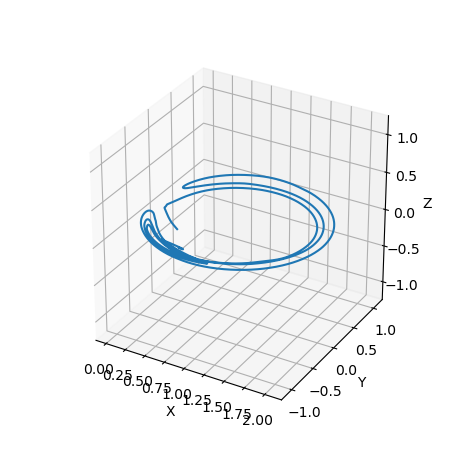

In [19]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.plot(flow2[0], flow2[1], flow2[2])
ax.set_box_aspect(aspect=(1,1,1), zoom=0.8)
ax.set_zlim(coordZ[0], coordZ[-1])
#ax.set_xlim(-1.1, -0.9)
#ax.set_ylim(-0.1, 0.1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()

In [20]:
r2 = [flow2[0][i]**2 + flow2[1][i]**2 + flow2[2][i]**2 for i in range (len(flow2[0]))]
print(np.max(r2))
print(np.min(r2))

4.231612510341599
0.011437724003828876


In [21]:
print(np.max(flow2[2]))
print(np.min(flow2[2]))

0.18606187062934065
0.038253902933654195


In [15]:
def printVels(cart):
    polar = geo.cartesianToSpherical(cart, dim = 3)
    rGrid = cell_center(data3d[1])
    aziGrid = cell_center(data3d[2])
    polarGrid = cell_center(data3d[3])
    rPoints = binSearch(rGrid, 0, len(rGrid), polar[0])
    aziPoints = binSearch(aziGrid, 0, len(aziGrid), polar[1])
    polarPoints = binSearch(polarGrid, 0, len(polarGrid), polar[2])
    lowr = rPoints[0]
    lowazi = aziPoints[0]
    lowpolar = polarPoints[0]

    print("R: " + str(data3d[6][lowpolar,lowazi,lowr]) + " Azimuthal: " + str(data3d[7][lowpolar,lowazi,lowr] - polar[0]))

printVels((-1.075, 0.027, 0))
printVels((-1.0, -0.025, 0))

R: 0.06770873327540093 Azimuthal: -0.05902778359420058
R: -0.0657854205702337 Azimuthal: 0.060232848026508856
